## Linear Regression

In [1]:
## Q1

## Simple Linear Regression - It has One independent and one dependent variable
## Multiple linear regression - It has multiple dependent and independent variables

In [2]:
## Q2

## To evaluate the performance of linear regression model we use:
## MAE - Mean Absolute error
## MSE - Mean Squared error
## RMSE - Root mean squared error
## R-squared - 
## Adjusted R-suqared - 

In [3]:
## Q4

## The need for regularizing the linear regression model when we face iverfitting problem in the model
## Means when we face problem of over training the model including the noise of the data as well or unwanted data and gives very good accuracy.
## Also face the problem of multicollinearity where we 

## There 2 types of regularisation L1 and L2:

## Here L1 regularization also called as Lasso Re 
## In L1 regularization it gives the sum of the absolute values of the coefficient

## In L2 regularization we also call it as Ridge regression
## In this the slight difference is we punish the model by sum of the squares of the coefficient

## Logistic Regression

In [5]:
## Q1

## Linear regression is used for prediction, estimation, of continuos dependemt variable like numerical data
## Finds linear relationship between dependent and independent variables
## For example estimating the stock prices
## For example prediction of marks in the exam

## Logistic regression is used to predict categorical idependent variable which inclued nominal and ordinal data.
## Finds the probabilty of event occuring where output is 0 and 1
## For example - Classification the job applicants between MALE and FEMALE
## For example - Whether there would be a possibilty of rainfall or not.

In [7]:
## Q2

## Sigmoid function is very important part of logistic regression
## It is a function used to map real valued input to a probabilty
## Formula = 1/1+e^-z

## It is used in logistic regression because we need to classify the model 
## In short it is used to give probablistic interpretations

In [8]:
## Q3

## Multicollinearity problem is the problem where we two features are very much or completely related/dependable to each other 
## To solve this problem we should first detect which features/independent varibles are relatedto each other
## Regularization is one of the method

 ## Decision Tree

In [10]:
## Q1

## First of all decision tree is an algorithm where we use both regression and classification tasks
## It forms a tree like stucture with the help of Nodes, Branches and Leaves
## here node represents features

## Root node is decided by selection the best feature who has high Gini index and Information gain
## Or that feature whose impurity is less as compared to other features
## And further the other nodes are splitted according to the minimum sample size. Means we traverse the tree
## We do this till we reach the leaf noe that is the end node of the tree.

## Prediction according to the task Classification or Regression

In [ ]:
## Q2

## It enables sampling with replacement, allowing the creation of multiple datasets from the original data for training model

In [11]:
## Q3

## As explained above the next nodes in tree are splitted according to the values of Gini impurity
## Where the feature has less impurity as compared to other impurity it is regarded as root node
## And further nodes are split according to it other nodes are assigned the position further

## Information Gain measures reduction in the step after the entropy

In [13]:
## Q4

## Overfitting in decision trees occurs when the tree becomes too complex and fits the training data too closely, including its noise and outliers.

## It can be prevented by methods like Pruning(Cutting the tree), Min_split, Max_split, Ensemble techniques

In [14]:
## Q5

## By the Help of GridSearchCV, Pruning we can maximize and minimize the depth of the tree
## If the tree is too deep it  will overfit 
## If the tree is too short it will underfit
## For that reson we need to use the above methods

## Ensemble Technique

In [15]:
## Q1

## Ensemble learning technique is a technique where multiple individual models are trained to solve same problem.
## And there predictions are combined to produce output
## It can improve the performance of the system rather than single model


In [ ]:
## Q2



In [16]:
## Q3

## Pasting is an ensemble learning technique where base models are trained on different random subsets of the data without any repetition of data points.

In [ ]:
## Q4

## OOB stands for Out Of Bag evaluation technique
## It is generally used to assess the performance of the ensemble model
##

## Linear Model Building

In [ ]:
## Create a Linear Regression model and apply regularization using the dataset from this link.
## Ensure that both Lasso and Ridge regularization are used, and perform feature selection using VIF.
## Follow the same process as before, including handling null values, removing duplicate rows, and performing necessary data visualization and plotting.

In [ ]:
##Link - https://raw.githubusercontent.com/s4sauravv/Datasets/refs/heads/main/Admission_Prediction.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/s4sauravv/Datasets/refs/heads/main/Admission_Prediction.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [3]:
data.shape

(500, 9)

In [4]:
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [5]:
## As you can see we have null values in columns GRE, TOEFL and University Rating
## We need to fill those null values with there mean values 

In [6]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

In [7]:
## for university column we use mode because it is a categorical column
## Mean for GRE and TOEFL score is a reasonal estimation
## For university rating mode is appropriate because it represents most common value

In [8]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
## As you can see null values are gone

In [10]:
data = data.drop(columns=['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


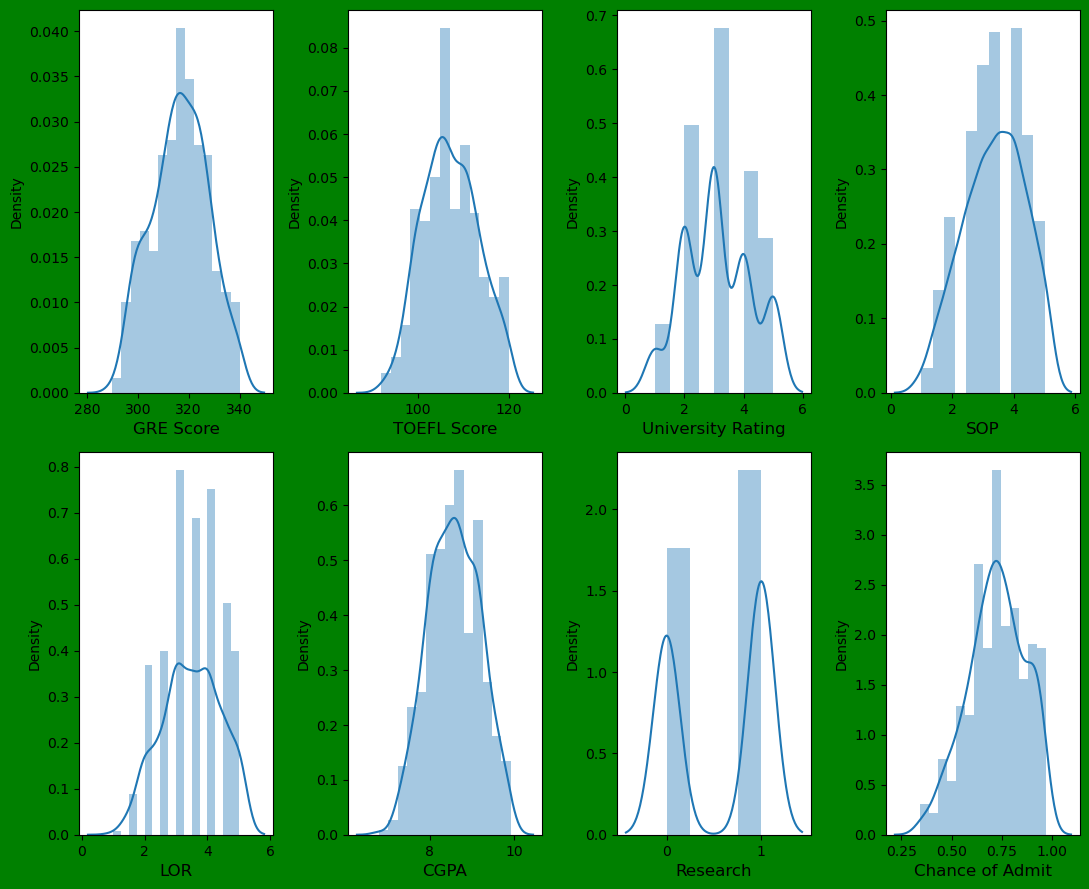

In [11]:
plt.figure(figsize=(11,9),facecolor='green')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)   ## Plots the graphs 2 rows and 4 columns at specified axis
        sns.distplot(data[column])    ## Plots a distribution plot of the data 
        plt.xlabel(column,fontsize=12)  
    plotnumber +=1     ## Increments or adds the graphs one by one
plt.tight_layout()

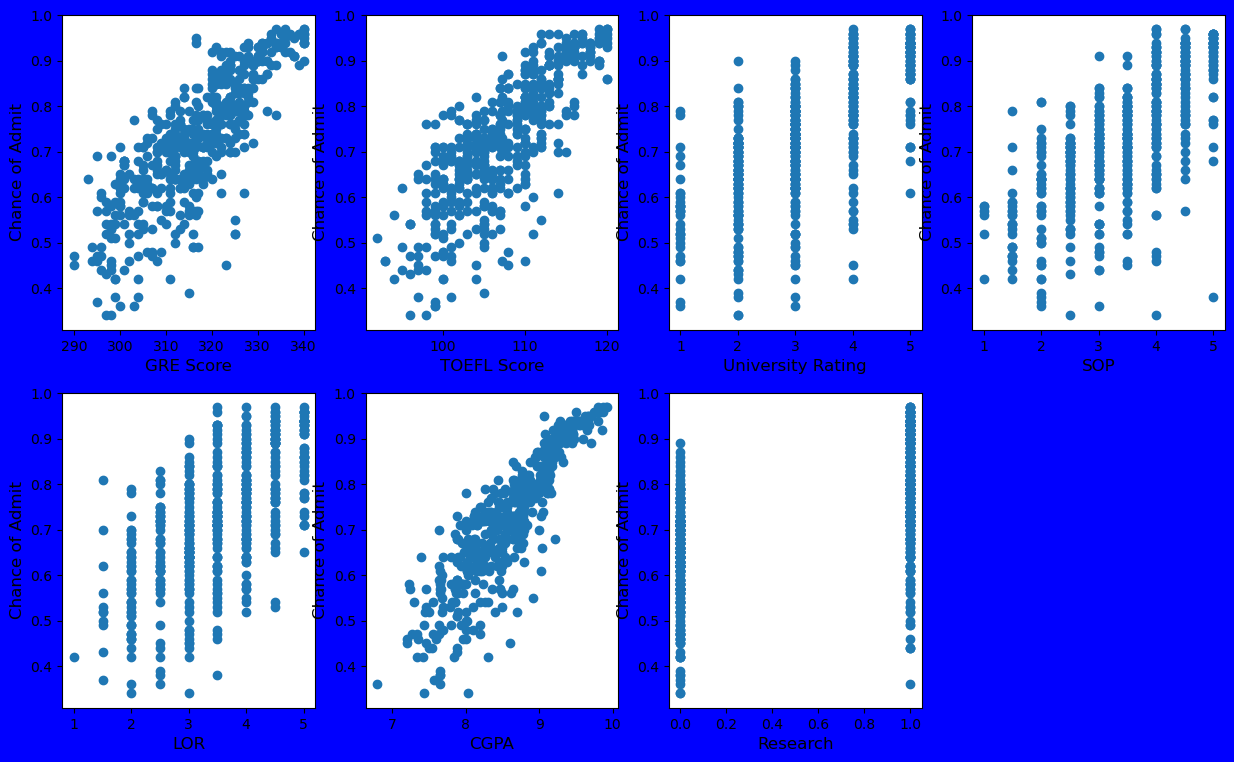

In [12]:
y=data['Chance of Admit']             ## Assigning y as labels
x=data.drop(columns=['Chance of Admit'])   ## By removing Label assigning remaning columns as features

plt.figure(figsize=(15,9),facecolor='blue')
plotnumber=1
for column in x:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)   ## Specifies the axis to the columns
        plt.scatter(x[column],y)         ## Plots the scatter plot
        plt.xlabel(column , fontsize=12)
        plt.ylabel('Chance of Admit',fontsize=12)
    plotnumber +=1
plt.show()

In [13]:
## We have plotted grahs and checked the relationship between independent and dependent variables

In [14]:
## Now we need to check the multicollinearity using VIF or Variation Inflation Factor
## First we need to import the model for VIF

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [17]:
## First we should standardize the data as shown above

In [18]:
x_scaled.shape

(500, 7)

In [19]:
## Finding VIF in each scaled column

In [20]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

vif['Features']=x.columns

In [21]:
vif

,vif,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


In [22]:
## To build a model we need to first split the dataset into training and testing data

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2, random_state = 0)
y_train.head()

107    0.91
336    0.72
71     0.96
474    0.67
6      0.75
Name: Chance of Admit, dtype: float64

In [32]:
x_scaled.shape

(500, 7)

In [33]:
x_train.shape

(400, 7)

In [34]:
model = LinearRegression()

In [35]:
model.fit(x_train,y_train)

LinearRegression()

In [36]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [37]:
print("Chance of Admission is : ",model.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of Admission is :  [0.82519669]


In [38]:
model.score(x_train,y_train)

0.8319991275688701

In [39]:
model.score(x_test,y_test)

0.7588343236564545

In [40]:
## Now as we have taken out the scores and traind the model

In [41]:
## Let us now visualize it

In [44]:
y_pred =(model.predict(x_test))
y_pred

array([0.65924578, 0.83392947, 0.7784012 , 0.88088697, 0.60151248,
       0.64303018, 0.52949081, 0.72541524, 0.52331114, 0.7471505 ,
       0.6102711 , 0.70960719, 0.62145427, 0.75327001, 0.88510033,
       0.5081327 , 0.8247222 , 0.64765362, 0.76562222, 0.53102853,
       0.51379982, 0.72320889, 0.51865025, 0.92261104, 0.82250014,
       0.73733786, 0.69792288, 0.50701392, 0.5813527 , 0.59499342,
       0.72691372, 0.48310316, 0.68668227, 0.8424367 , 0.56268178,
       0.59737057, 0.84546016, 0.86806488, 0.58960299, 0.65930754,
       0.66840843, 0.90325365, 0.86629714, 0.72092358, 0.77329078,
       0.80782931, 0.97139959, 0.85088172, 0.65645073, 0.65408543,
       0.63095562, 0.63639365, 0.61201303, 0.80092481, 0.69468954,
       0.83156483, 0.52342254, 0.86333515, 0.59898547, 0.6354385 ,
       0.49770544, 0.90852825, 0.61786923, 0.94766444, 0.71892676,
       0.61470517, 0.73625361, 0.84421023, 0.51857903, 0.77780718,
       0.89639382, 0.78369433, 0.69729865, 0.63930646, 0.78367

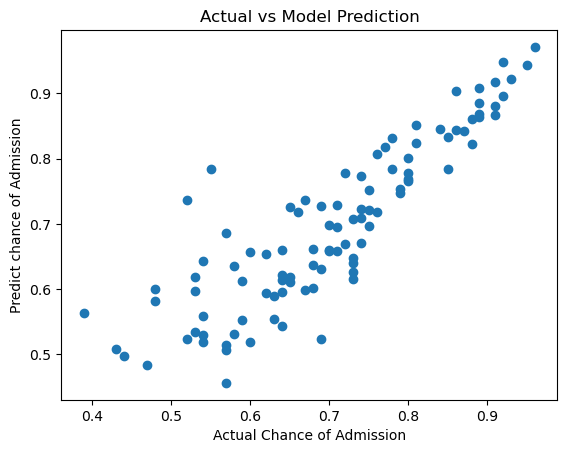

In [45]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predict chance of Admission')
plt.title('Actual vs Model Prediction')
plt.show()

In [46]:
## As you can see in the graph the model is actually linear

In [47]:
## Now let us evaluate the model

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [49]:
y_pred=model.predict(x_test)

In [50]:
mean_absolute_error(y_test,y_pred)

0.04916703783447361

In [51]:
mean_squared_error(y_test,y_pred)

0.004211898245920935

In [53]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06489913902295573

## Hence we have successfully created Linear Regression model